In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


import h5py
#from read_raw import load_from_file
import maxlab_analysis as mla

import time
from scipy.signal import find_peaks
import scipy.stats as stats
from sklearn.decomposition import PCA, NMF
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, OPTICS, SpectralClustering#, HDBSCAN


ImportError: cannot import name 'HDBSCAN' from 'sklearn.cluster' (c:\Users\nwu04\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\__init__.py)

In [2]:
X_pca = np.load('batch2_20439div15_pca.npy')

t = np.linspace(0, np.shape(X_pca)[0] * (1/1250), np.shape(X_pca)[0])

In [3]:
st = time.time()
kmeans_labels = KMeans(n_clusters = 2).fit_predict(X_pca)
print('done kmeans')
print('t = ' + str(time.time() - st))


c:\Users\nwu04\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


done kmeans
t = 3.1166486740112305


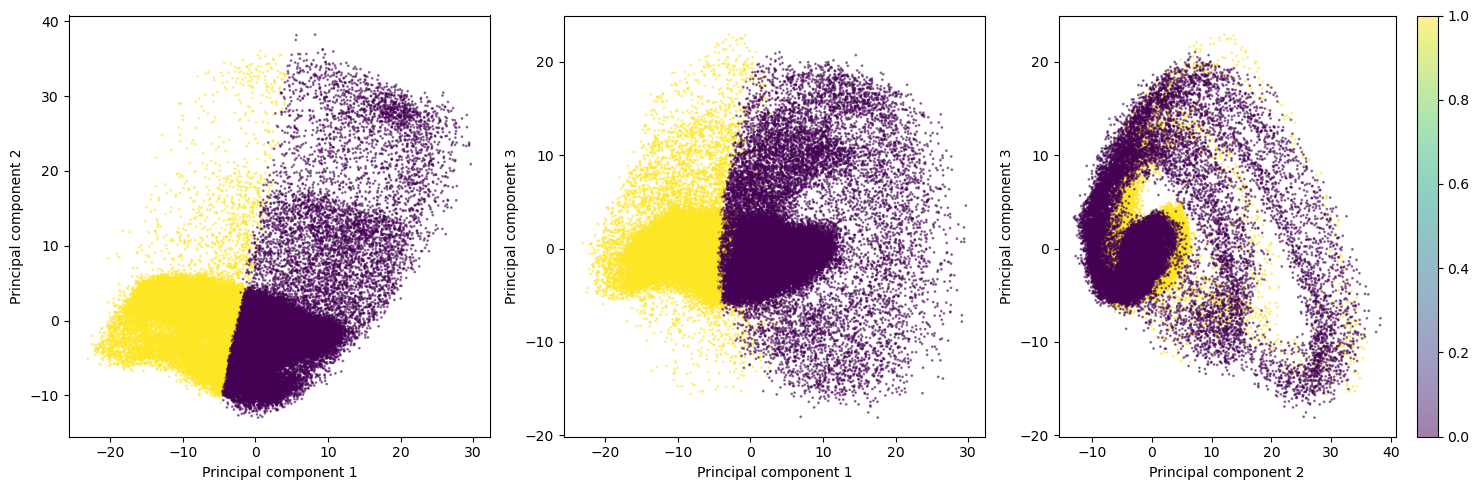

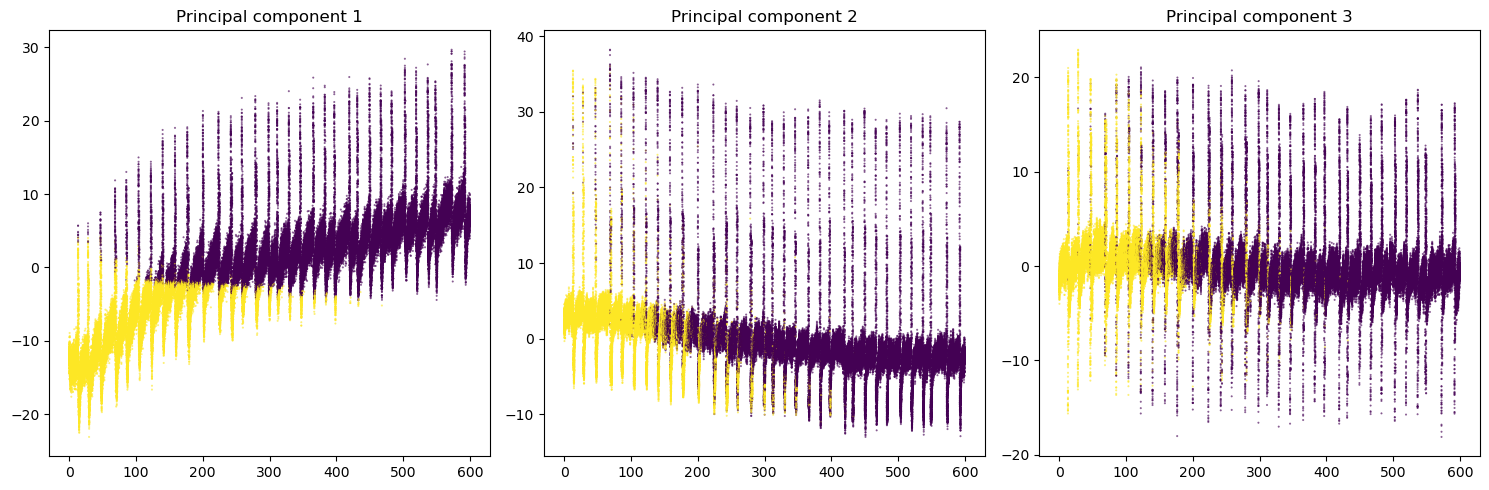

In [4]:
%matplotlib inline
fig = plt.figure(figsize = (15, 5))

plt.subplot(131)

plt.scatter(X_pca[::5, 0], X_pca[::5, 1],  s = 1, c = kmeans_labels[::5], alpha = 0.5)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

plt.subplot(132)

plt.scatter(X_pca[::5, 0], X_pca[::5, 2],  s = 1, c = kmeans_labels[::5], alpha = 0.5)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 3')

plt.subplot(133)
plt.scatter(X_pca[::5, 1], X_pca[::5, 2],  s = 1, c = kmeans_labels[::5], alpha = 0.5)
plt.colorbar()
plt.xlabel('Principal component 2')
plt.ylabel('Principal component 3')
plt.tight_layout()
plt.show()

n_components = np.shape(X_pca)[1]
fig_width = 3
plt.figure(figsize = (fig_width * 5, (int(np.ceil(n_components/fig_width)) * 5)))
for i in np.arange(1, n_components + 1):
    plt.subplot(int(np.ceil(n_components/fig_width)), fig_width, i)
    plt.scatter(t[::5], X_pca[::5, i-1], c = kmeans_labels[::5], linewidth = 0.5, s = 1, alpha = 0.5)
    plt.title('Principal component ' + str(i))
plt.tight_layout()
plt.show()

In [5]:
st = time.time()
spectralclustering_labels = SpectralClustering(n_clusters = 2).fit_predict(X_pca)
print('done spectral clustering')
print('t = ' + str(time.time() - st))

MemoryError: Unable to allocate 4.09 TiB for an array with shape (750100, 750100) and data type float64

In [ ]:
%matplotlib inline
fig = plt.figure(figsize = (15, 5))

plt.subplot(131)

plt.scatter(X_pca[::5, 0], X_pca[::5, 1],  s = 1, c = spectralclustering_labels[::5], alpha = 0.5)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

plt.subplot(132)

plt.scatter(X_pca[::5, 0], X_pca[::5, 2],  s = 1, c = spectralclustering_labels[::5], alpha = 0.5)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 3')

plt.subplot(133)
plt.scatter(X_pca[::5, 1], X_pca[::5, 2],  s = 1, c = spectralclustering_labels[::5], alpha = 0.5)
plt.colorbar()
plt.xlabel('Principal component 2')
plt.ylabel('Principal component 3')
plt.tight_layout()
plt.show()

n_components = np.shape(X_pca)[1]
fig_width = 3
plt.figure(figsize = (fig_width * 5, (int(np.ceil(n_components/fig_width)) * 5)))
for i in np.arange(1, n_components + 1):
    plt.subplot(int(np.ceil(n_components/fig_width)), fig_width, i)
    plt.scatter(t[::5], X_pca[::5, i-1], c = spectralclustering_labels[::5], linewidth = 0.5, s = 1, alpha = 0.5)
    plt.title('Principal component ' + str(i))
plt.tight_layout()
plt.show()

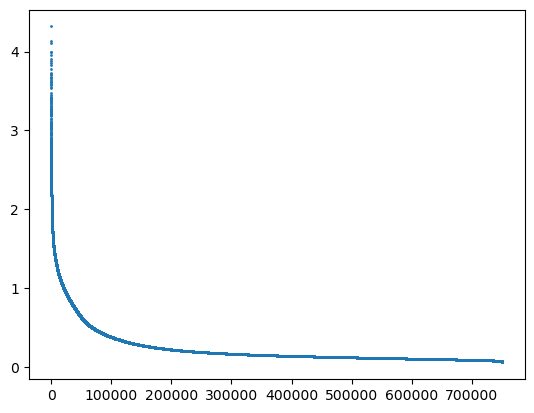

In [12]:
from sklearn.neighbors import NearestNeighbors

neighbors = 15
# X_pca is your data
nbrs = NearestNeighbors(n_neighbors=neighbors ).fit(X_pca)
distances, indices = nbrs.kneighbors(X_pca)
distance_desc = sorted(distances[:,neighbors-1], reverse=True)
plt.scatter(x=list(range(1,len(distance_desc )+1)),y= distance_desc, s = 1)

2.109529869336836


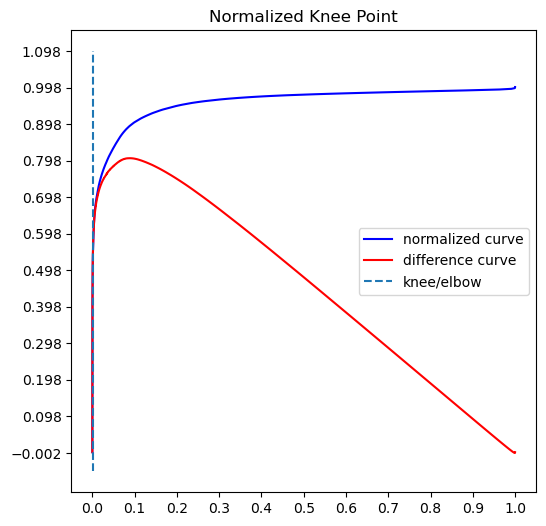

In [13]:
from kneed import KneeLocator
kneedle = KneeLocator(range(1,len(distance_desc)+1),  #x values
                      distance_desc, # y values
                      S=1.0, #parameter suggested from paper
                      curve="convex", #parameter from figure
                      direction="decreasing") #parameter from figure

kneedle.plot_knee_normalized()
print(kneedle.knee_y)

In [10]:
X_reduced_pca = X_pca[:, 0:2]
st = time.time()
dbscan_labels = DBSCAN(eps = kneedle.knee_y, min_samples = neighbors).fit_predict(X_pca)
print(max(dbscan_labels))
print('done dbscan')
print('t = ' + str(time.time() - st))
st = time.time()

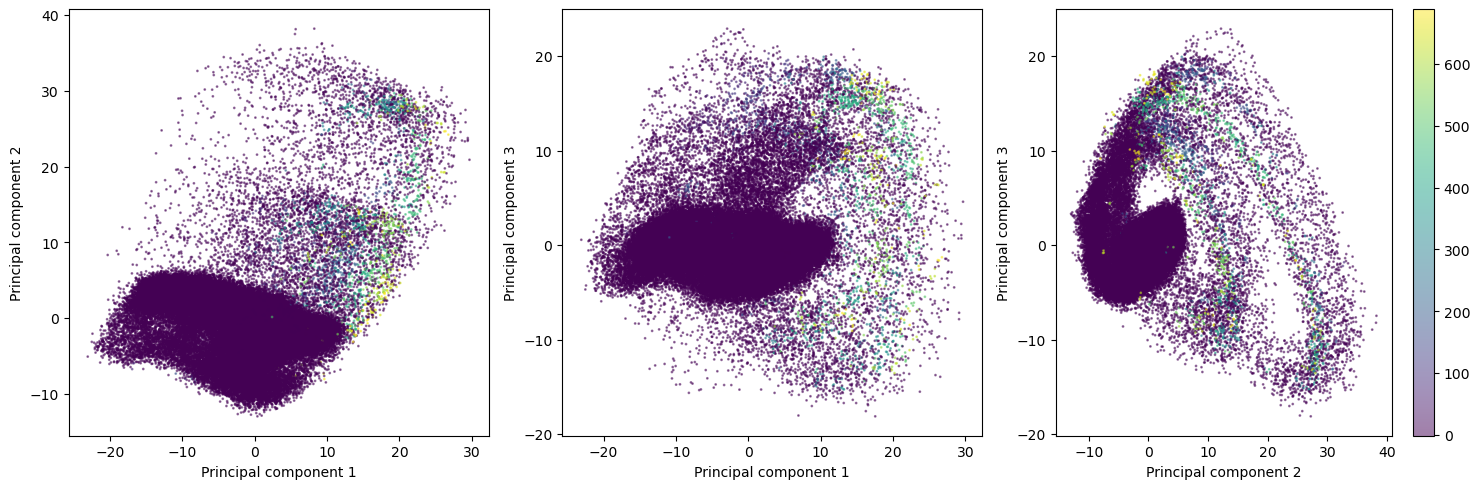

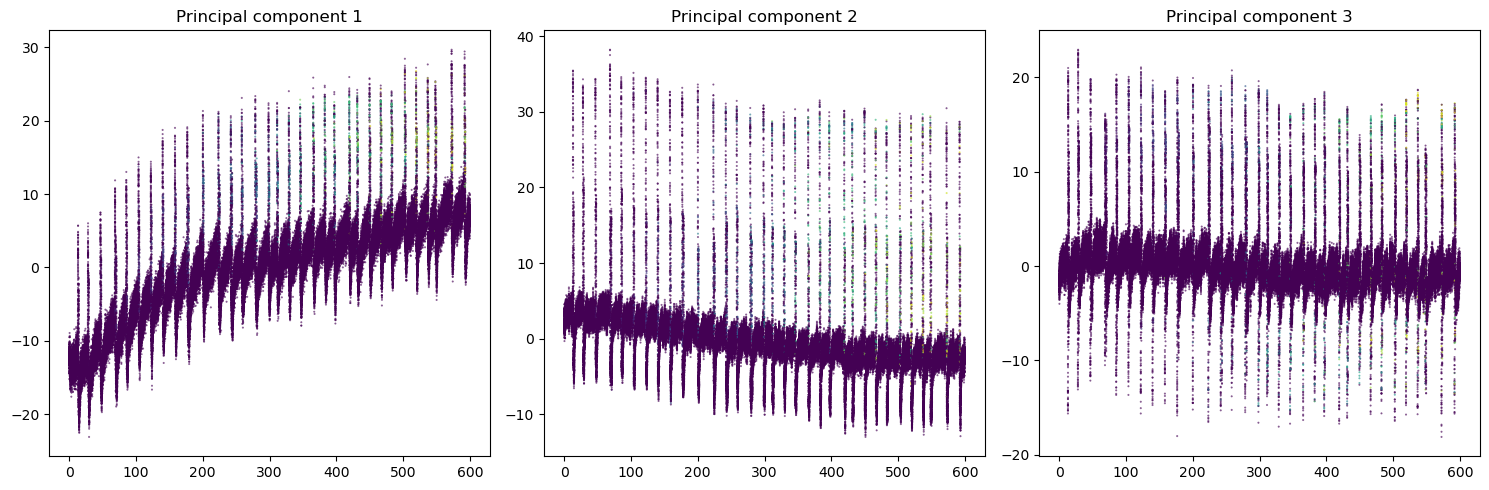

In [6]:
%matplotlib inline
fig = plt.figure(figsize = (15, 5))

plt.subplot(131)

plt.scatter(X_pca[::5, 0], X_pca[::5, 1],  s = 1, c = dbscan_labels[::5], alpha = 0.5)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

plt.subplot(132)

plt.scatter(X_pca[::5, 0], X_pca[::5, 2],  s = 1, c = dbscan_labels[::5], alpha = 0.5)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 3')

plt.subplot(133)
plt.scatter(X_pca[::5, 1], X_pca[::5, 2],  s = 1, c = dbscan_labels[::5], alpha = 0.5)
plt.colorbar()
plt.xlabel('Principal component 2')
plt.ylabel('Principal component 3')
plt.tight_layout()
plt.show()

n_components = np.shape(X_pca)[1]
fig_width = 3
plt.figure(figsize = (fig_width * 5, (int(np.ceil(n_components/fig_width)) * 5)))
for i in np.arange(1, n_components + 1):
    plt.subplot(int(np.ceil(n_components/fig_width)), fig_width, i)
    plt.scatter(t[::5], X_pca[::5, i-1], c = dbscan_labels[::5], linewidth = 0.5, s = 1, alpha = 0.5)
    plt.title('Principal component ' + str(i))
plt.tight_layout()
plt.show()

In [15]:
optics_labels = OPTICS(min_samples = 10, max_eps = 3).fit_predict(X_pca)
st = time.time()
print(max(optics_labels))
print('done optics')
print('t = ' + str(time.time() - st))
st = time.time()

4396
done optics


NameError: name 'st' is not defined

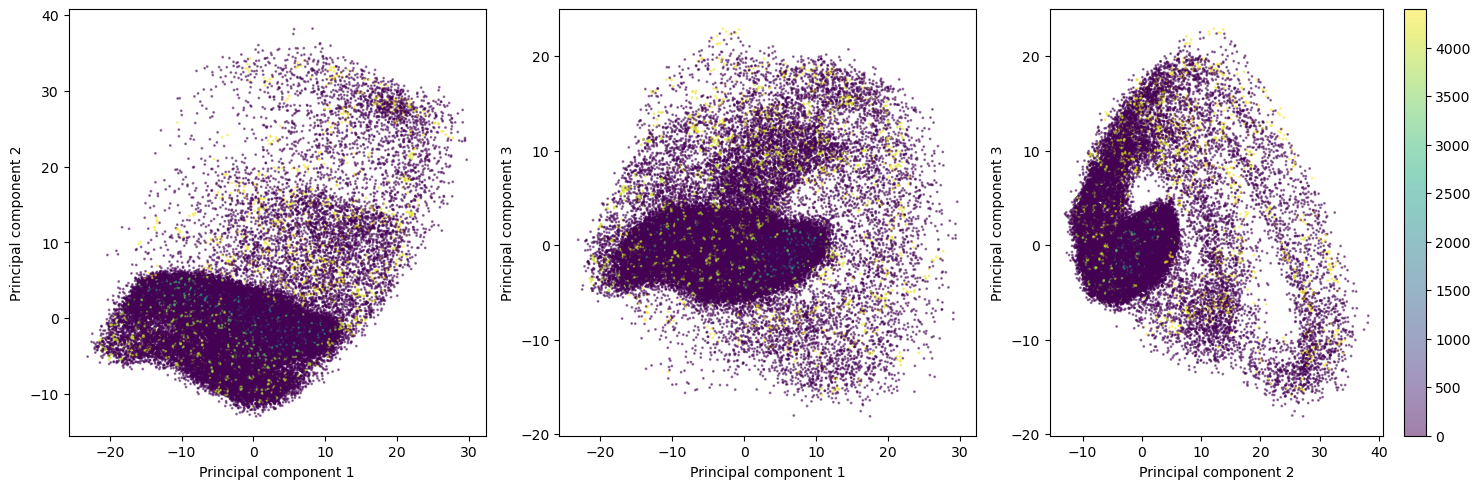

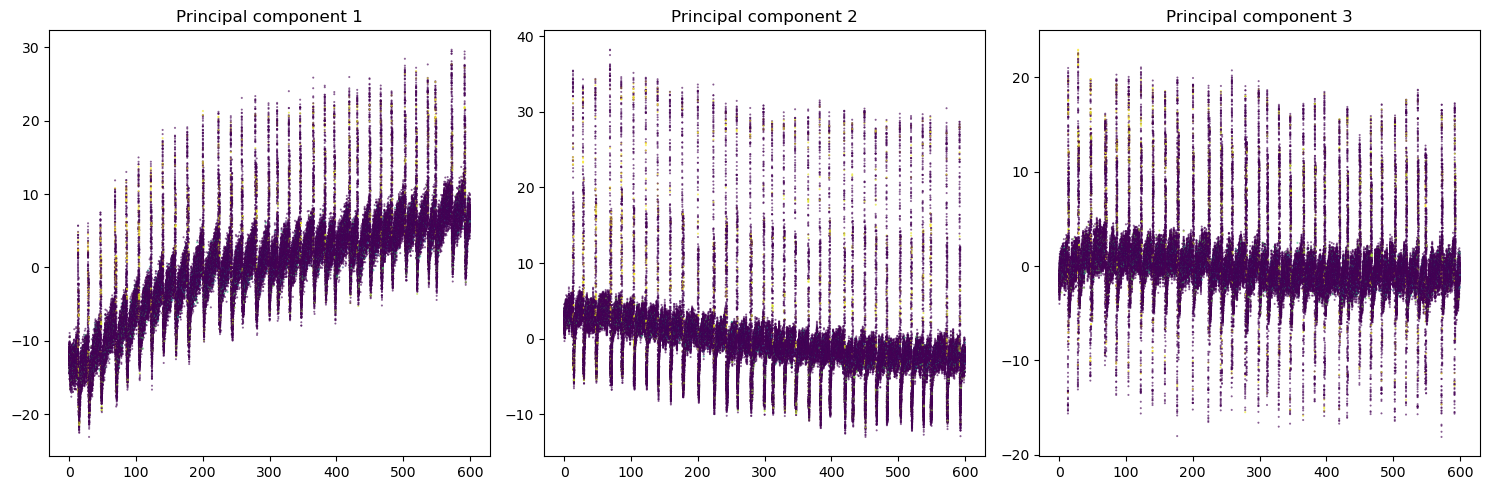

In [16]:
%matplotlib inline
fig = plt.figure(figsize = (15, 5))

plt.subplot(131)

plt.scatter(X_pca[::5, 0], X_pca[::5, 1],  s = 1, c = optics_labels[::5], alpha = 0.5)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

plt.subplot(132)

plt.scatter(X_pca[::5, 0], X_pca[::5, 2],  s = 1, c = optics_labels[::5], alpha = 0.5)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 3')

plt.subplot(133)
plt.scatter(X_pca[::5, 1], X_pca[::5, 2],  s = 1, c = optics_labels[::5], alpha = 0.5)
plt.colorbar()
plt.xlabel('Principal component 2')
plt.ylabel('Principal component 3')
plt.tight_layout()
plt.show()

n_components = np.shape(X_pca)[1]
fig_width = 3
plt.figure(figsize = (fig_width * 5, (int(np.ceil(n_components/fig_width)) * 5)))
for i in np.arange(1, n_components + 1):
    plt.subplot(int(np.ceil(n_components/fig_width)), fig_width, i)
    plt.scatter(t[::5], X_pca[::5, i-1], c = optics_labels[::5], linewidth = 0.5, s = 1, alpha = 0.5)
    plt.title('Principal component ' + str(i))
plt.tight_layout()
plt.show()